In stochastic gradient descent (SGD) and gradient descent (GD), the loss-epoch curves may have a similar overall shape, but they are not necessarily the same in terms of specific levels and behavior. Here's a general comparison of the two:

Overall Shape:

SGD: The loss-epoch curve in SGD typically exhibits more fluctuations and noise compared to GD. This is because in SGD, you update the model parameters using a single random data point (or a small random batch) at each iteration. This randomness can cause the loss to jump around during training.
GD: The loss-epoch curve in GD tends to be smoother because it computes the gradient using the entire training dataset at each iteration. As a result, the updates are more consistent.
Convergence Behavior:

SGD: SGD may converge to a solution faster than GD because of its frequent updates. However, it might not converge to the global minimum and can get stuck in local minima due to its stochastic nature.
GD: GD tends to converge to the global minimum (or a good local minimum) of the loss function but may require more iterations to do so. It has a more deterministic convergence behavior.
Level and Scale:

SGD: The loss values at each epoch may vary more widely because of the random sampling of data points. It can have a jagged appearance with ups and downs.
GD: The loss values tend to decrease more smoothly and consistently, often with smaller variations between epochs.
In summary, while the overall shapes of the loss-epoch curves in SGD and GD may both show a decreasing trend, SGD tends to exhibit more noise and fluctuations, whereas GD is smoother and more deterministic. The specific levels and behavior of the curves will depend on factors like the learning rate, batch size, and the nature of the loss landscape for the problem you are solving

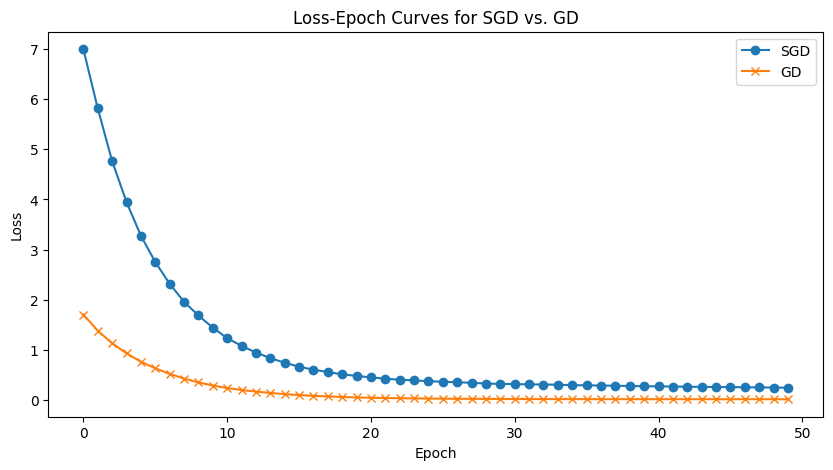

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Define the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model with SGD
history_sgd = model.fit(X, y, epochs=50, verbose=0)

# Reset the model and compile it for GD
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model with GD
history_gd = model.fit(X, y, epochs=50, verbose=0)

# Plot the loss-epoch curves
plt.figure(figsize=(10, 5))
plt.plot(history_sgd.history['loss'], label='SGD', marker='o')
plt.plot(history_gd.history['loss'], label='GD', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss-Epoch Curves for SGD vs. GD')
plt.show()


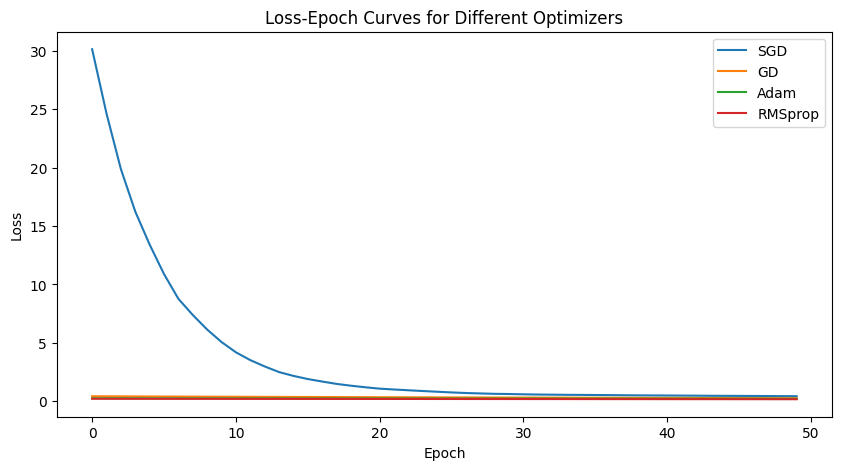

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 ** X + 3* X + 2 + 0.1 * np.random.randn(100, 1)

# Define the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model with different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'GD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

losses = {}

# Train the model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X, y, epochs=50, verbose=0)
    losses[optimizer_name] = history.history['loss']

# Plot the loss-epoch curves
plt.figure(figsize=(10, 5))
for optimizer_name, loss_values in losses.items():
    plt.plot(loss_values, label=optimizer_name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss-Epoch Curves for Different Optimizers')
plt.show()


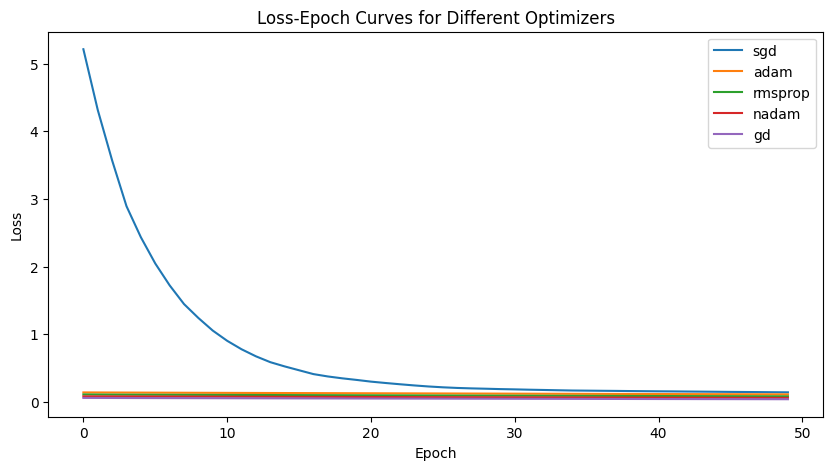

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Define the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop', 'nadam']
losses = []

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X, y, epochs=50, verbose=0)
    losses.append(history.history['loss'])

# Training with GD (full dataset)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')
history_gd = model.fit(X, y, epochs=50, verbose=0)
losses.append(history_gd.history['loss'])

# Plot the loss-epoch curves
plt.figure(figsize=(10, 5))

for i, optimizer in enumerate(optimizers + ['gd']):
    plt.plot(losses[i], label=optimizer)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss-Epoch Curves for Different Optimizers')
plt.show()


a brief explanation of the differences between these optimization algorithms:

Stochastic Gradient Descent (SGD): Updates the model parameters using a single random data point or a small random batch at each iteration. It introduces randomness and noise in training.

Gradient Descent (GD): Uses the entire training dataset to compute the gradient for each parameter update, resulting in smoother convergence but potentially slower.

Adam: Combines the ideas of momentum and RMSprop. It adapts the learning rates for each parameter and is known for fast convergence and robustness.

RMSprop: Adjusts the learning rates adaptively based on the recent gradient magnitudes. It helps overcome some of the issues of fixed learning rates.

Nadam (Nesterov Adam): Combines the benefits of Nesterov's accelerated gradient descent and the adaptive learning rate of Adam. It is often considered a robust optimizer.

Each optimizer has its strengths and weaknesses, and the choice of which one to use depends on the specific problem, dataset, and training requirements. You may need to experiment with different optimizers and hyperparameters to find the best one for your task.

The choice of optimization method for different machine learning tasks, including image processing, audio processing, speech recognition, text NLP (Natural Language Processing), signal processing, and video processing, can vary depending on the specific problem, neural network architecture, and data characteristics. Here's a general overview of commonly used optimization methods for these tasks:

Image Processing:

For Convolutional Neural Networks (CNNs) commonly used in image processing, popular optimizers include Adam, RMSprop, and SGD with momentum. These optimizers adapt well to the complex and high-dimensional nature of image data.


Audio Processing:

Similar to image processing, optimizers like Adam and RMSprop are commonly used for deep learning models applied to audio data. These optimizers can handle large and complex audio datasets.
Speech Recognition:

In speech recognition tasks, Adam and RMSprop are frequently used. Additionally, specialized acoustic models often benefit from Connectionist Temporal Classification (CTC) loss, which works in conjunction with these optimizers.

Text NLP (Natural Language Processing):

For NLP tasks such as text classification, sequence-to-sequence tasks, and language modeling, Adam and RMSprop are commonly used optimizers. Transformer-based models like BERT and GPT often use Adam.

Signal Processing:

Signal processing tasks may involve various optimizers depending on the nature of the data and the neural network architecture. Adam, RMSprop, and SGD are commonly used, but sometimes specialized optimizers may be needed for specific signal processing tasks.

Video Processing:

Video processing can involve both spatial and temporal information. Optimizers like Adam and RMSprop are frequently used for spatial features extracted from individual frames. For recurrent neural networks (RNNs) or 3D CNNs for temporal processing, SGD with momentum or Adam is common.

It's important to note that there is no one-size-fits-all optimization method, and the choice often requires experimentation and hyperparameter tuning. Factors such as dataset size, architecture complexity, training stability, and convergence speed play a role in selecting the appropriate optimizer. Researchers and data scientists may also propose novel optimization methods tailored to specific tasks or neural network architectures.

11490434/11490434 [==============================] - 1s 0us/step
Training with optimizer: sgd
Epoch 1/5
1875/1875 - 30s - loss: 0.4995 - accuracy: 0.8606 - val_loss: 0.2594 - val_accuracy: 0.9214 - 30s/epoch - 16ms/step
Epoch 2/5
1875/1875 - 29s - loss: 0.2434 - accuracy: 0.9284 - val_loss: 0.2046 - val_accuracy: 0.9396 - 29s/epoch - 15ms/step
Epoch 3/5
1875/1875 - 29s - loss: 0.1922 - accuracy: 0.9427 - val_loss: 0.1677 - val_accuracy: 0.9491 - 29s/epoch - 15ms/step
Epoch 4/5
1875/1875 - 29s - loss: 0.1572 - accuracy: 0.9538 - val_loss: 0.1356 - val_accuracy: 0.9600 - 29s/epoch - 15ms/step
Epoch 5/5
1875/1875 - 29s - loss: 0.1326 - accuracy: 0.9606 - val_loss: 0.1227 - val_accuracy: 0.9616 - 29s/epoch - 15ms/step
Training with optimizer: <keras.src.optimizers.adam.Adam object at 0x79a010626770>
Epoch 1/5
1875/1875 - 35s - loss: 0.1164 - accuracy: 0.9647 - val_loss: 0.0660 - val_accuracy: 0.9786 - 35s/epoch - 19ms/step
Epoch 2/5
1875/1875 - 35s - loss: 0.0485 - accuracy: 0.9849 - val_l

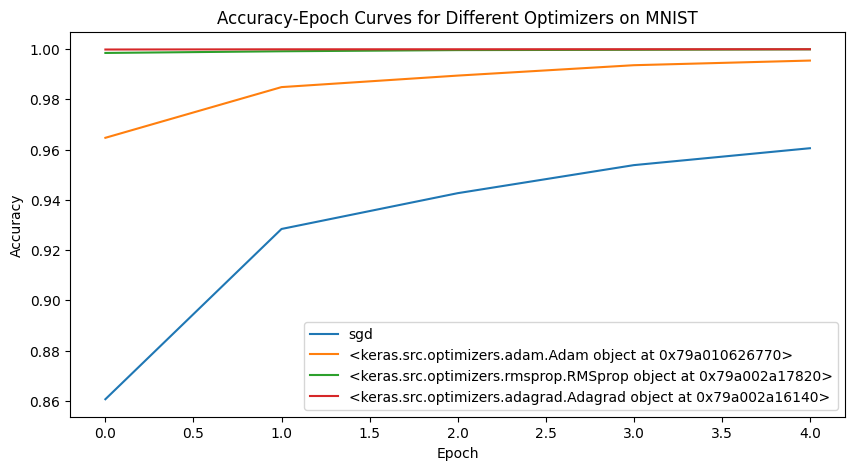

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define a list of optimizers to compare
optimizers = [
    'sgd',
    tf.keras.optimizers.Adam(learning_rate=0.001),
    tf.keras.optimizers.RMSprop(learning_rate=0.001),
    tf.keras.optimizers.Adagrad(learning_rate=0.001)
]

# Lists to store accuracy history for each optimizer
history_accuracy = []

# Training loop for each optimizer
for optimizer in optimizers:
    print(f"Training with optimizer: {optimizer}")

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(test_images[..., np.newaxis], test_labels), verbose=2)

    history_accuracy.append(history.history['accuracy'])

# Plot accuracy-epoch curves for each optimizer
plt.figure(figsize=(10, 5))
for i, optimizer in enumerate(optimizers):
    plt.plot(history_accuracy[i], label=optimizer)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy-Epoch Curves for Different Optimizers on MNIST')
plt.show()


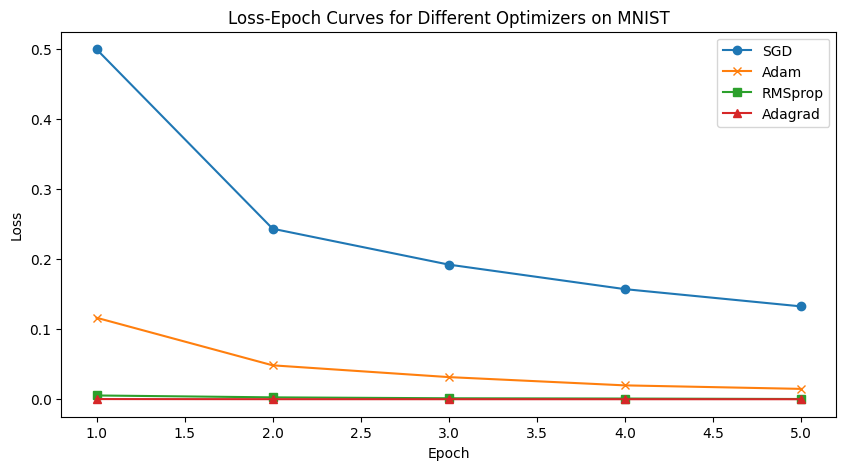

In [ ]:
import matplotlib.pyplot as plt

# Loss values for each optimizer
losses_sgd = [0.4995, 0.2434, 0.1922, 0.1572, 0.1326]
losses_adam = [0.1164, 0.0485, 0.0317, 0.0199, 0.0149]
losses_rmsprop = [0.0055, 0.0028, 0.0015, 0.0011, 4.6430e-04]
losses_adagrad = [3.6633e-04, 2.0255e-04, 1.6765e-04, 1.5210e-04, 1.4235e-04]

# Epochs (assuming 5 epochs)
epochs = [1, 2, 3, 4, 5]

# Plot the loss-epoch curves for each optimizer
plt.figure(figsize=(10, 5))

plt.plot(epochs, losses_sgd, label='SGD', marker='o')
plt.plot(epochs, losses_adam, label='Adam', marker='x')
plt.plot(epochs, losses_rmsprop, label='RMSprop', marker='s')
plt.plot(epochs, losses_adagrad, label='Adagrad', marker='^')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss-Epoch Curves for Different Optimizers on MNIST')
plt.show()


**SGD (Stochastic Gradient Descent)**:


SGD is a classic optimization algorithm widely used in machine learning.

It updates the model parameters by computing the gradient of the loss with respect to the parameters for each mini-batch of training data.

It has a learning rate hyperparameter (lr) that determines the step size for parameter updates.

SGD uses a constant learning rate throughout training.

It does not adapt the learning rate based on the progress of training, which can lead to slow convergence or getting stuck in local minima.

In practice, SGD can be sensitive to the choice of the learning rate, and it may require fine-tuning.

**Adam (Adaptive Moment Estimation):**

Adam is an advanced optimization algorithm that combines ideas from both Momentum and RMSprop.

It adapts the learning rates for each parameter based on their past gradients and squared gradients.

Adam uses moving averages of the gradients (momentum) and the squared gradients (RMSprop) to adjust the learning rates dynamically.

It is known for its robustness and efficiency in a wide range of deep learning tasks.

Adam often converges faster than SGD and requires less manual tuning of the learning rate.

It has two main hyperparameters: lr (learning rate) and betas (coefficients for momentum and squared gradients).

**RMSprop (Root Mean Square Propagation):**


RMSprop is another optimization algorithm designed to address some of the issues of plain SGD.

It adapts the learning rates individually for each parameter based on the moving average of squared gradients.

RMSprop can handle sparse gradients and has a smoothing effect on the learning rate.

It tends to adapt the learning rates better than plain SGD, making it less sensitive to the choice of learning rate.

Like Adam, RMSprop can often converge faster than plain SGD.

It has a lr (learning rate) hyperparameter, and it also has a decay factor for the moving average of squared gradients.

In summary:

SGD is a simple and widely used optimizer but may require manual tuning of the learning rate.

Adam is a popular choice due to its adaptive learning rates and robustness to hyperparameter settings.

RMSprop is similar to Adam but with a different algorithm for adapting the learning rates.

The choice of optimizer depends on the specific problem and dataset.

SGD might show steady but potentially slower improvement.

Adam is known for quick convergence but sometimes can lead to overfitting.

RMSprop is similar to Adam, often performing well on non-stationary problems.

Adagrad adjusts its learning rate based on parameters, good for sparse data